# Loading data and importing libraries



Connecting my google drive to google colab, to uploud the dataset permanently

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing important libraries to hande and deal with data like pandas ans numpy

In [ ]:
import numpy as np
import pandas as pd
import random

Uploading the dataset

In [ ]:
dataFrame=pd.read_csv('/content/drive/MyDrive/Complaints (1).csv')
#printing the head (first 5 rows) instead of printing the whole dataset
dataFrame.head()

,CASE_ID,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,...,RESOLUTION_DESCRIPTION,CASE_DESC,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,CAS-1060890-L3D6Q6,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,...,NaN,NaN,CBU / EBU - personal view,Technical,Internet,Technical complaint,NaN,NaN,NaN,NaN
1,CAS-388567-W4B9Q3,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,...,NaN,NaN,System Administrator,Commercial,Mobile,Commercial claim,NaN,NaN,NaN,NaN
2,CAS-1494939-L9F0X7,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,...,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint,NaN,NaN,NaN,NaN
3,CAS-1059985-K3Y9F7,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,18.06.2022 20:38,MOATH,18.06.2022 20:38,...,NaN,NaN,NaN,Technical,Internet,Technical complaint,NaN,NaN,NaN,NaN
4,CAS-1239942-Y1S2F5,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,06.07.2022 01:22,IBRAHIM,06.07.2022 01:22,...,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint,NaN,NaN,NaN,NaN


# **DATA PREPROCESSING**

In [ ]:
dataFrame.shape

(10415, 26)

In [ ]:
#Prints how many null values every column have
print(dataFrame.isnull().sum())

CASE_ID                       0
OFFER_NAME                 1293
CUSTOMER_TYPE                 0
CUSTOMER_GROUP             1348
CURRENT_STATUS                0
ESCALATION_FLAG               0
ESCALATED_GROUP            7055
OPEN_DATE                     0
OPEN_USER                   362
CLOSE_DATE                  119
CLOSE_GROUP                4890
CLOSE_USER                  516
AGE_BRACKET                 119
ACTUAL_COMPLAINT              0
CALLBACK_MECHANISM         7277
RESOLUTION                10336
RESOLUTION_DESCRIPTION    10376
CASE_DESC                  9243
OPEN_GR                    4561
COMPLAINT_TYPE                0
PRODUCT                       0
CASE                          0
Unnamed: 22               10415
Unnamed: 23               10415
Unnamed: 24               10415
Unnamed: 25               10415
dtype: int64


In [ ]:
#Checking if there is any duplicated records
dataFrame.duplicated().sum()

0

In [ ]:
#Dropping 4 columns
df=dataFrame.drop(['CLOSE_GROUP','RESOLUTION','RESOLUTION_DESCRIPTION','CASE_DESC','OPEN_GR'],axis=1)
#Checking the result
df.head()

,CASE_ID,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,...,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,COMPLAINT_TYPE,PRODUCT,CASE,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,CAS-1060890-L3D6Q6,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,...,2.0,Actual Complaint,Phone,Technical,Internet,Technical complaint,NaN,NaN,NaN,NaN
1,CAS-388567-W4B9Q3,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,...,1.0,Not Actual Complaint,Phone,Commercial,Mobile,Commercial claim,NaN,NaN,NaN,NaN
2,CAS-1494939-L9F0X7,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,...,1.0,User Not Filled,NaN,Technical,Internet,Technical complaint,NaN,NaN,NaN,NaN
3,CAS-1059985-K3Y9F7,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,18.06.2022 20:38,MOATH,18.06.2022 20:38,...,1.0,User Not Filled,NaN,Technical,Internet,Technical complaint,NaN,NaN,NaN,NaN
4,CAS-1239942-Y1S2F5,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,06.07.2022 01:22,IBRAHIM,06.07.2022 01:22,...,1.0,User Not Filled,NaN,Technical,Internet,Technical complaint,NaN,NaN,NaN,NaN


In [ ]:
#Printing the data type of each column
print(df.info())
#Checking the number of null values in each column after dropping
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10415 entries, 0 to 10414
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CASE_ID             10415 non-null  object 
 1   OFFER_NAME          9122 non-null   object 
 2   CUSTOMER_TYPE       10415 non-null  object 
 3   CUSTOMER_GROUP      9067 non-null   object 
 4   CURRENT_STATUS      10415 non-null  object 
 5   ESCALATION_FLAG     10415 non-null  object 
 6   ESCALATED_GROUP     3360 non-null   object 
 7   OPEN_DATE           10415 non-null  object 
 8   OPEN_USER           10053 non-null  object 
 9   CLOSE_DATE          10296 non-null  object 
 10  CLOSE_USER          9899 non-null   object 
 11  AGE_BRACKET         10296 non-null  float64
 12  ACTUAL_COMPLAINT    10415 non-null  object 
 13  CALLBACK_MECHANISM  3138 non-null   object 
 14  COMPLAINT_TYPE      10415 non-null  object 
 15  PRODUCT             10415 non-null  object 
 16  CASE

In [ ]:
#OFFER NAME
#Filling all null values with -1, to use it in 'where'
df['OFFER_NAME']=df['OFFER_NAME'].fillna(-1)
df['OFFER_NAME']=np.where((df['OFFER_NAME']==-1)&(df['PRODUCT']=='Internet')&(df['CUSTOMER_TYPE']=='EBU'),'FTTB Corporate',df['OFFER_NAME'])
df['OFFER_NAME']=np.where((df['OFFER_NAME']==-1)&(df['PRODUCT']=='Internet')&(df['CUSTOMER_TYPE']=='CBU'),'FTTH Home',df['OFFER_NAME'])
df['OFFER_NAME']=np.where((df['OFFER_NAME']==-1)&(df['PRODUCT']=='Mobile')&(df['CUSTOMER_TYPE']=='CBU'),'OnLine Prepaid',df['OFFER_NAME'])
df['OFFER_NAME']=np.where((df['OFFER_NAME']==-1)&(df['PRODUCT']=='Mobile')&(df['CUSTOMER_TYPE']=='EBU'),'UBL-15',df['OFFER_NAME'])
#Relacing all -1 with null, to check that there are no null values
df['OFFER_NAME']= df['OFFER_NAME'].replace(-1,np.nan)
df['OFFER_NAME'].isnull().sum()
#df.to_csv('TRY.csv') , To see the result

0

In [ ]:
#CUSTOMER_GROUP
#Filling all null values with -1, to use it in 'where'
df['CUSTOMER_GROUP']=df['CUSTOMER_GROUP'].fillna(-1)
df['CUSTOMER_GROUP']=np.where((df['CUSTOMER_GROUP']==-1)&(df['PRODUCT']=='Mobile')&(df['CUSTOMER_TYPE']=='CBU'),'Prepaid',df['CUSTOMER_GROUP'])
df['CUSTOMER_GROUP']=np.where((df['CUSTOMER_GROUP']==-1)&(df['PRODUCT']=='Mobile')&(df['CUSTOMER_TYPE']=='EBU'),'Corporate Large Account',df['CUSTOMER_GROUP'])
df['CUSTOMER_GROUP']=np.where((df['CUSTOMER_GROUP']==-1)&(df['PRODUCT']=='Internet')&(df['OFFER_NAME']=='FTTB Corporate'),'FTTB Corporate',df['CUSTOMER_GROUP'])
df['CUSTOMER_GROUP']=np.where((df['CUSTOMER_GROUP']==-1)&(df['PRODUCT']=='Internet')&(df['OFFER_NAME']=='FTTH Home'),'FTTH Home',df['CUSTOMER_GROUP'])
#Relacing all -1 with null, to check that there are no null values
df['CUSTOMER_GROUP']= df['CUSTOMER_GROUP'].replace(-1,np.nan)
df['CUSTOMER_GROUP'].isnull().sum()
#df.to_csv('TRY.csv') , To see the result

0

In [ ]:
#ESCALATED GROUP
#The number of null vales in escalated group
print(df['ESCALATED_GROUP'].isnull().sum())
#Saving the rows when the escalation flag is no in a new dataframe
df_no = df.loc[df['ESCALATION_FLAG'] == 'No']
#Printing the mode
print(df['ESCALATED_GROUP'].mode())
#The number of null values in escalated group where the flag = no
null_count = df_no['ESCALATED_GROUP'].isnull().sum()
print(null_count)
#Filling the null values with flag 'no' with no group
df['ESCALATED_GROUP']=np.where(df['ESCALATION_FLAG']=='No','No Group',df['ESCALATED_GROUP'])
 #Filling the 42 null values with the mode
df['ESCALATED_GROUP']=df['ESCALATED_GROUP'].fillna('Mobile_BO')
#df.to_csv('TRY.csv'), To see the result

7055
0    Mobile_BO
Name: ESCALATED_GROUP, dtype: object
7013


In [ ]:
#OPEN USER
#Saving the rows without null values
not_null1 = df['OPEN_USER'].dropna()
# Select 362 random values from the not-null1
random_values1 = not_null1.sample(362)
# Filling the null values with the random values selected from the same column
#For loop that fills the null values with different random value everytime
for i, value in enumerate(random_values1):
    df['OPEN_USER']=df['OPEN_USER'].fillna(value, limit=1)
df['OPEN_USER'].isnull().sum()

0

In [ ]:
#CLOSE_USER
#Filling null values in close user with the same value in open user if the escalated flag is no and the case is resolved
df['CLOSE_USER']=np.where((df['ESCALATION_FLAG']=='No') &(df['CURRENT_STATUS']=='Resolved'),df['OPEN_USER'],df['CLOSE_USER'])
#Filling null values with no close user when the case is active, regardless if the escalation flag is no or yes
df['CLOSE_USER']=np.where(df['CURRENT_STATUS']=='Active' ,'No Close User',df['CLOSE_USER'])
#Printing the number of null values after filling some of them
print(df['CLOSE_USER'].isnull().sum())
#Saving the rows without null values
not_null2= df['CLOSE_USER'].dropna()
# Select 394 random values from the not-null2
random_values2 = not_null2.sample(394)
# Filling the null values with the random values selected from the same column
#For loop that fills the null values with different random value everytime
for i, value in enumerate(random_values2):
    df['CLOSE_USER']=df['CLOSE_USER'].fillna(value, limit=1)
df['CLOSE_USER'].isnull().sum()
#df.to_csv('try.csv')

394


0

In [ ]:
#CLOSE DATE
#No close date when the case is active (all null values are when the case is active, that's why I didn't use where)
df['CLOSE_DATE']=df['CLOSE_DATE'].fillna('No Close Date')

In [ ]:
#AGE BRACKET
#No age when the case is active (all null values are when the case is active, that's why I didn't use where)
df['AGE_BRACKET']=df['AGE_BRACKET'].fillna('-1')

In [ ]:
#Callback mechanism
callback ='CALLBACK_MECHANISM'
#For loop that fills the null values with random value eachtime from SMS OR phone
for i in range(len(df)):
    if pd.isnull(df.loc[i, callback]):
        df.loc[i, callback] = random.choice(['Phone','SMS'])
#df.to_csv('TRY.csv')

In [ ]:
#Checking that all missing values are handled
df.isnull().sum()

,0
CASE_ID,0
OFFER_NAME,0
CUSTOMER_TYPE,0
CUSTOMER_GROUP,0
CURRENT_STATUS,0
ESCALATION_FLAG,0
ESCALATED_GROUP,0
OPEN_DATE,0
OPEN_USER,0
CLOSE_DATE,0


In [ ]:
#Printing the dataframe after handling all missing values
df.head()

,CASE_ID,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,...,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,COMPLAINT_TYPE,PRODUCT,CASE,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,CAS-1060890-L3D6Q6,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,...,2.0,Actual Complaint,Phone,Technical,Internet,Technical complaint,NaN,NaN,NaN,NaN
1,CAS-388567-W4B9Q3,OnLine Prepaid,CBU,Prepaid,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,...,1.0,Not Actual Complaint,Phone,Commercial,Mobile,Commercial claim,NaN,NaN,NaN,NaN
2,CAS-1494939-L9F0X7,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,No Group,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,...,1.0,User Not Filled,SMS,Technical,Internet,Technical complaint,NaN,NaN,NaN,NaN
3,CAS-1059985-K3Y9F7,FTTH Home,CBU,FTTH Home,Resolved,No,No Group,18.06.2022 20:38,MOATH,18.06.2022 20:38,...,1.0,User Not Filled,SMS,Technical,Internet,Technical complaint,NaN,NaN,NaN,NaN
4,CAS-1239942-Y1S2F5,FTTH Home,CBU,FTTH Home,Resolved,No,No Group,06.07.2022 01:22,IBRAHIM,06.07.2022 01:22,...,1.0,User Not Filled,Phone,Technical,Internet,Technical complaint,NaN,NaN,NaN,NaN


In [ ]:
df=dataFrame.drop(['CLOSE_GROUP','Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],axis=1)

Converting the data frame to an excel shhet agian

In [ ]:
#Downloading the dataframe after handelling all data
df.to_csv('complaintsNew.csv')

# **MACHINE LEARNING MODELS**

Training the ML models to predict the values in 'PRODUCT' column

In [ ]:
#Importing important libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
#identify all categorical variables
cat_columns = df.select_dtypes(['object']).columns
#convert all categorical variables to numeric
label_encoder = LabelEncoder()
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])
#df[cat_columns] = df[cat_columns].apply(LabelEncoder().fit_transform)
df.head()

,CASE_ID,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,...,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,RESOLUTION,RESOLUTION_DESCRIPTION,CASE_DESC,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,0,0,0,0,0,0,0,0,0,0,...,2.0,0,0,-1,-1,-1,0,0,0,0
1,1,-1,0,-1,0,0,1,1,1,1,...,1.0,1,0,-1,-1,-1,1,1,1,1
2,2,1,0,1,0,1,-1,2,2,2,...,1.0,2,-1,-1,-1,-1,2,0,0,0
3,3,0,0,0,0,1,-1,3,3,3,...,1.0,2,-1,-1,-1,-1,-1,0,0,0
4,4,0,0,0,0,1,-1,4,4,4,...,1.0,2,-1,-1,-1,-1,2,0,0,0


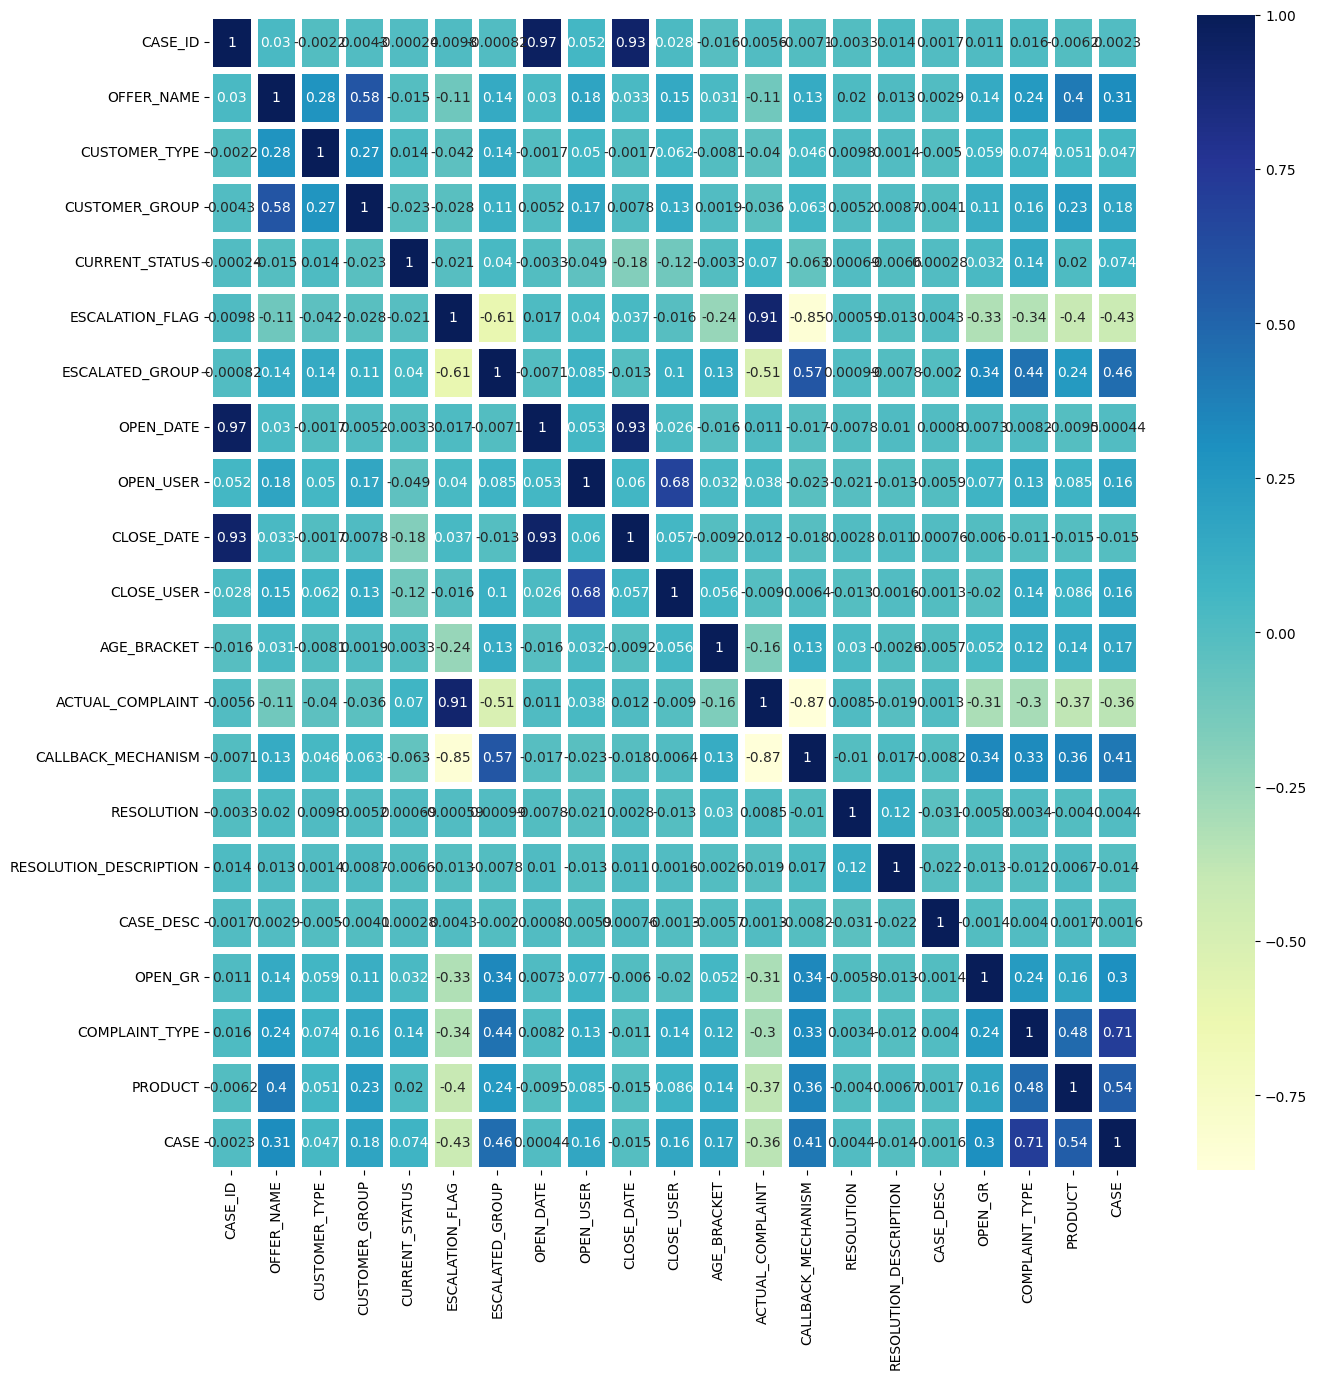

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
dataplot=sb.heatmap(df.corr(), cmap="YlGnBu", annot=True,linewidths=5)

In [ ]:
# storing the input values in the X variable (Independent variables)
X = df.drop(['PRODUCT'], axis=1)
# storing all the ouputs in Y variable (Dependent variables)
Y = df['PRODUCT']

In [ ]:
report = pd.DataFrame(index=['accuracy_score','recall_score','precision_score','f1_score'],columns=['KNN','DT','NB','RF'])
report

,KNN,DT,NB,RF
accuracy_score,NaN,NaN,NaN,NaN
recall_score,NaN,NaN,NaN,NaN
precision_score,NaN,NaN,NaN,NaN
f1_score,NaN,NaN,NaN,NaN


KNN

In [ ]:
sum_acc = 0
sum_pre = 0
sum_rec = 0
sum_f1 = 0
KNNaccList=[]
classifier = KNeighborsClassifier(n_neighbors=3)
for i in range(30):
  X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.33)
  classifier.fit(X_train,Y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  KNNaccList.append(acc)
  sum_acc = sum_acc + acc
  rec = recall_score(y_test,y_pred)
  sum_rec = sum_rec + rec
  pre =  precision_score(y_test,y_pred)
  sum_pre = sum_pre + pre
  f1 = f1_score(y_test,y_pred)
  sum_f1 = sum_f1 + f1
print('Average Accuracy:', sum_acc/30)
print('Average Recall:', sum_rec/30)
print('Average Precision:', sum_pre/30)
print('Average F1-Score:', sum_f1/30)
report['KNN'] = [sum_acc/30, sum_acc/30, sum_pre/30, sum_f1/30]

DECISION TREE

In [ ]:
sum_acc = 0
sum_pre = 0
sum_rec = 0
sum_f1 = 0
DTaccList=[]
classifier2 = DecisionTreeClassifier()
for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
  classifer2 = classifier2.fit(X_train,y_train)
  y_pred= classifier2.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  DTaccList.append(acc)
  sum_acc = sum_acc + acc
  rec = recall_score(y_test,y_pred)
  sum_rec = sum_rec + rec
  pre =  precision_score(y_test,y_pred)
  sum_pre = sum_pre + pre
  f1= f1_score(y_test,y_pred)
  sum_f1 = sum_f1 + f1
print('Average Accuracy:', sum_acc/30)
print('Average Recall:', sum_rec/30)
print('Average Precision:', sum_pre/30)
print('Average F1-Score:', sum_f1/30)
report['DT'] = [sum_acc/30, sum_acc/30, sum_pre/30, sum_f1/30]

GAUSSIAN NAIVE BAYES

In [ ]:
sum_acc = 0
sum_pre = 0
sum_rec = 0
sum_f1 = 0
NBaccList=[]
classifier3 = GaussianNB()
for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
  classifier3 = classifier3.fit(X_train,y_train)
  y_pred= classifier3.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  NBaccList.append(acc)
  sum_acc = sum_acc + acc
  rec = recall_score(y_test,y_pred)
  sum_rec = sum_rec + rec
  pre =  precision_score(y_test,y_pred)
  sum_pre = sum_pre + pre
  f1= f1_score(y_test,y_pred)
  sum_f1 = sum_f1 + f1
print('Average Accuracy:', sum_acc/30)
print('Average Recall:', sum_rec/30)
print('Average Precision:', sum_pre/30)
print('Average F1-Score:', sum_f1/30)
report['NB'] = [sum_acc/30, sum_acc/30, sum_pre/30, sum_f1/30]

In [ ]:
NBaccList

RANDOM FOREST

In [ ]:
sum_acc = 0
sum_pre = 0
sum_rec = 0
sum_f1 = 0
RFaccList=[]
classifier4=RandomForestClassifier(n_estimators = 100)
for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
  classifier4 = classifier4.fit(X_train,y_train)
  y_pred= classifier4.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  RFaccList.append(acc)
  sum_acc = sum_acc + acc
  rec = recall_score(y_test,y_pred)
  sum_rec = sum_rec + rec
  pre =  precision_score(y_test,y_pred)
  sum_pre = sum_pre + pre
  f1= f1_score(y_test,y_pred)
  sum_f1 = sum_f1 + f1
print('Average Accuracy:', sum_acc/30)
print('Average Recall:', sum_rec/30)
print('Average Precision:', sum_pre/30)
print('Average F1-Score:', sum_f1/30)
report['RF'] = [sum_acc/30, sum_acc/30, sum_pre/30, sum_f1/30]

In [ ]:
report

# **DATA VISUALIZATION**

In [ ]:
import matplotlib.pyplot as plt

BAR CHART

In [ ]:
KNNValues=list(report['KNN'])
print(KNNValues)
DTValues=list(report['DT'])
print(DTValues)
NBValues=list(report['NB'])
print(NBValues)
RFValues=list(report['RF'])
print(RFValues)

In [ ]:
machine_learning_model_name = ['KNN','DT','NB','RF']
machine_learning_model_accuracy = [KNNValues[0]*100,DTValues[0]*100,NBValues[0]*100,RFValues[0]*100]
machine_learning_model_precision = [KNNValues[1]*100,DTValues[1]*100,NBValues[1]*100,RFValues[1]*100]
machine_learning_model_Recall = [KNNValues[2]*100,DTValues[2]*100,NBValues[2]*100,RFValues[2]*100]
machine_learning_model_F_measure = [KNNValues[3]*100,DTValues[3]*100,NBValues[3]*100,RFValues[3]*100]
X_axis = np.arange(len(machine_learning_model_name))
(X_axis+0.1)

plt.bar(X_axis+0.1, machine_learning_model_accuracy, color ='pink',width = 0.20,edgecolor = 'black',label = 'accuracy')
plt.bar(X_axis+0.30, machine_learning_model_precision, color ='yellow',width = 0.20,edgecolor = 'black',label = 'precision')
plt.bar(X_axis + 0.50, machine_learning_model_Recall, color ='grey',width = 0.20,edgecolor = 'black',label = 'Recall')
plt.bar(X_axis + 0.70, machine_learning_model_F_measure, color ='blue',width = 0.20,edgecolor = 'black',label = 'F measure')
plt.xticks(X_axis+0.35, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Machine learning model")
plt.ylabel("Percentage")
plt.title("Summary of Results")
plt.show()


RADAR CHART

In [ ]:
KNN_values = report['KNN'].to_numpy()
np.append(KNN_values,KNN_values[0])

In [ ]:
report

In [ ]:
subjects=['Accuracy','Recall','Precision  ''F-measure']
KNN_values=report['KNN'].to_numpy()
DT_values=report['DT'].to_numpy()
NB_values=report['NB'].to_numpy()
RF_values=report['RF'].to_numpy()
angles=np.linspace(0,2*np.pi,len(subjects), endpoint=False)
print(angles)
print(angles *(180 / 3.14)) #convert from Radians to Degrees
#add the first angle at the end of the array to completely describe the circle.
angles=np.concatenate((angles,[angles[0]]))
# #Append the first value for all other arrays/lists used for visualization to maintain length consistency
subjects.append(subjects[0])
np.append(NB_values,NB_values[0])
np.append(RF_values,RF_values[0])
np.append(KNN_values,KNN_values[0])
np.append(DT_values, DT_values[0])
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)
#basic plot
ax.plot(angles,NB_values , 'o--', color='Blue', label='NB')
#fill plot
ax.fill(angles, NB_values, alpha=0.20, color='Blue')
#RT Plot
ax.plot(angles,RF_values, 'o-', color='Yellow', linewidth=1, label='RF')
ax.fill(angles, RF_values, alpha=0.25, color='Yellow')
#KNN
ax.plot(angles, KNN_values, 'o--', color='Gray', label='KNN')
#fill plot
ax.fill(angles, KNN_values, alpha=0.20, color='Gray')
#DT
ax.plot(angles, DT_values, 'o--', color='Pink', label='DT')
#fill plot
ax.fill(angles, DT_values, alpha=0.20, color='Pink')

#The spacing of angles and the labels can be customized by using set_thetagrids function.
ax.set_thetagrids(angles * 180/np.pi, subjects,fontsize=12)
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS[-1::-1]:
    tick.set_pad(24)

plt.grid(True)
plt.legend()
plt.show()

BOX PLOT

In [ ]:
accuracy = {1:[KNNaccList,NBaccList], 2:[DTaccList,RFaccList]}
# Creating plot
plt.yticks(np.arange(0.65, 0.85, 0.02))
plt.boxplot(accuracy[1])
plt.title("Accuracy Score for KNN and Naive bayes")
# show plot
plt.show()

In [ ]:
plt.yticks(np.arange(0.9, 1, 0.002))
plt.boxplot(accuracy[2])
plt.title("Accuracy Score for Decision tree and Random forest")
plt.show()